# Separate Plots

In [1]:
# # Layers

# layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
# params_layers = [1074816, 1140480, 1206144, 1271808, 1337472, 1403136, 1468800, 1534464, 1600128, 1665792, 1731456, \
#                  1797120, 1862784, 1928448, 1994112, 2059776, 2125440, 2191104, 2256768, 2322432, 2388096, 2453760, \
#                  2519424, 2585088, 2650752, 2716416, 2782080, 2847744, 2913408, 2979072, 3044736, 3110400, 3176064, \
#                  3241728, 3307392, 3373056, 3438720, 3504384, 3570048, 3635712]

# heads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 
# params_heads = [1099392, 1228032, 1373056, 1534464, 1712256, 1906432, 2805120, 3130368, 3472000, 3830016, \
#                 4204416, 4595200, 6280320, 6802176, 7340416, 7895040, 8466048, 9053440, 11524992, 12243456, \
#                 12978304, 13729536, 14497152, 15281152, 18539136, 19454208, 20385664, 21333504, 22297728, \
#                 23278336, 27322752, 28434432, 29562496, 30706944, 31867776, 33044992, 37875840, 39184128, \
#                 40508800, 41849856]   

# dims_per_head = [16, 32, 64, 128, 256, 512]
# params_dims_per_head = [1534464, 3130368, 7895040, 28434432, 104116224, 412766208]


# layers_three_ratio = [4,8,12,16,20,24,28]
# params_three_ratio = [1046016, 1534464, 4689664, 14714880, 44660736, 96764416, 221874432] 

# layers_dims_ratio = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
# params_layers_dims_ratio = [1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, 11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

In [84]:
import wandb
import numpy as np
from scipy.stats import sem

def get_mean_std_wandb(groups, metric="best_val_loss"):
    means = []
    stds = []

    for GROUP in groups:
        print("Group:", GROUP)
        run_filters = {"group": GROUP}
        runs = wandb.Api().runs(path="arjun-team/scaling_logs", filters=run_filters)
        values = []
        for run in runs:
            if run.state == "finished":
                if metric not in run.summary:
                    print("Run:", run.name, "- metric not available")
                    continue
                else:
                    print("Run:", run.name, "- metric available")
                    best_metric = run.summary[metric]
                    if best_metric != None: values.append(best_metric)
#         print(GROUP, "- #Runs with metrics:", len(values), "Value:", round(np.mean(values), 4), "+-", round(sem(values), 4))
        means.append(round(np.mean(values), 4))
        stds.append(round(sem(values), 4))
    return means, stds

In [85]:
import wandb
import numpy as np
from scipy.stats import sem
import os
from glob import glob

def get_mean_std_from_csv(groups, metric="best_val_loss"):
    means = []
    stds = []

    for GROUP in groups:
        basedir = os.path.join("/home/toolkit/pytorch-transformer-ts/lag-gpt-flows/scaling-logs", GROUP)
        
        values = []
        for seed in os.listdir(basedir):
            fulldir = os.path.join(basedir, seed, "experiments")
            
            lightning_version_to_use = None
            max_epoch = -1
            if "lightning_logs" in os.listdir(fulldir):
                for lightning_version in os.listdir(fulldir+"/lightning_logs/"):
                    ckpts = glob(fulldir+"/lightning_logs/" + lightning_version + "/checkpoints/*.ckpt")
                    if len(ckpts): 
                        epoch = int(ckpts[0][ckpts[0].find("=")+1:ckpts[0].find("-step")])
                        if epoch > max_epoch:
                            lightning_version_to_use = lightning_version
                            max_epoch = epoch
                if lightning_version_to_use: pass
#                     print("Using lightning_version", lightning_version_to_use, "with epoch", max_epoch)
                else: continue
            
            if not os.path.isfile(fulldir+"/lightning_logs/"+str(lightning_version_to_use)+"/metrics.csv"):
                continue
            
            loss_df = pd.read_csv(fulldir+"/lightning_logs/"+str(lightning_version_to_use)+"/metrics.csv")
            
            best_val_loss = loss_df.dropna(subset=[metric])
            best_val_loss = best_val_loss[metric].iloc[-1]
            
            values.append(best_val_loss)
            
        means.append(round(np.mean(values), 4))
        stds.append(round(sem(values), 4))
    
    return means, stds

# Augmentation Probability = 0.5

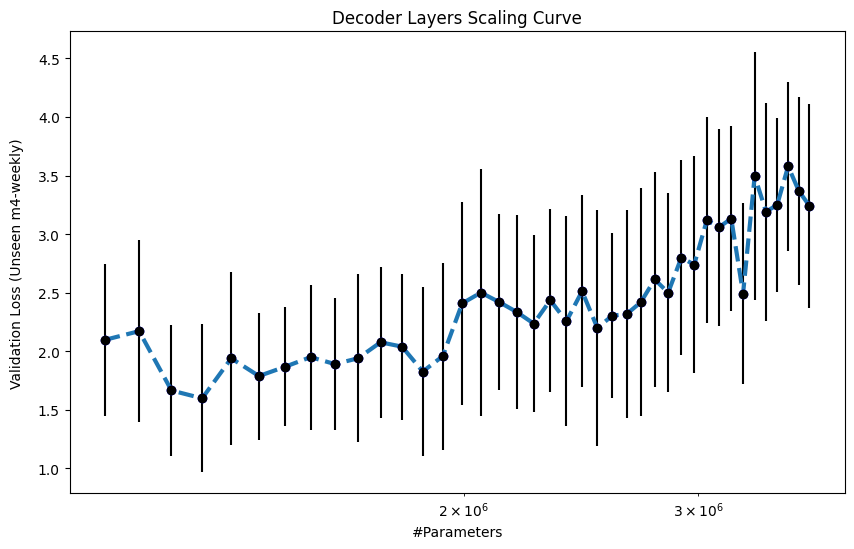

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_halfaug = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
params_layers_halfaug = [1074816, 1140480, 1206144, 1271808, 1337472, 1403136, 1468800, 1534464, 1600128, 1665792, 1731456, \
                 1797120, 1862784, 1928448, 1994112, 2059776, 2125440, 2191104, 2256768, 2322432, 2388096, 2453760, \
                 2519424, 2585088, 2650752, 2716416, 2782080, 2847744, 2913408, 2979072, 3044736, 3110400, 3176064, \
                 3241728, 3307392, 3373056, 3438720, 3504384, 3570048, 3635712]

groups = []
for layer in layers_halfaug:
    groups.append("data-scaling-uniform-0.5_layers_"+str(layer))
    
mean_y_layers_halfaug, stderr_y_layers_halfaug = get_mean_std_wandb(groups)

plt.errorbar(params_layers_halfaug, mean_y_layers_halfaug, yerr=stderr_y_layers_halfaug, fmt='o', color="black")
plt.plot(
    params_layers_halfaug, mean_y_layers_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Decoder Layers Scaling Curve")
plt.savefig('layers.png')

plt.show()

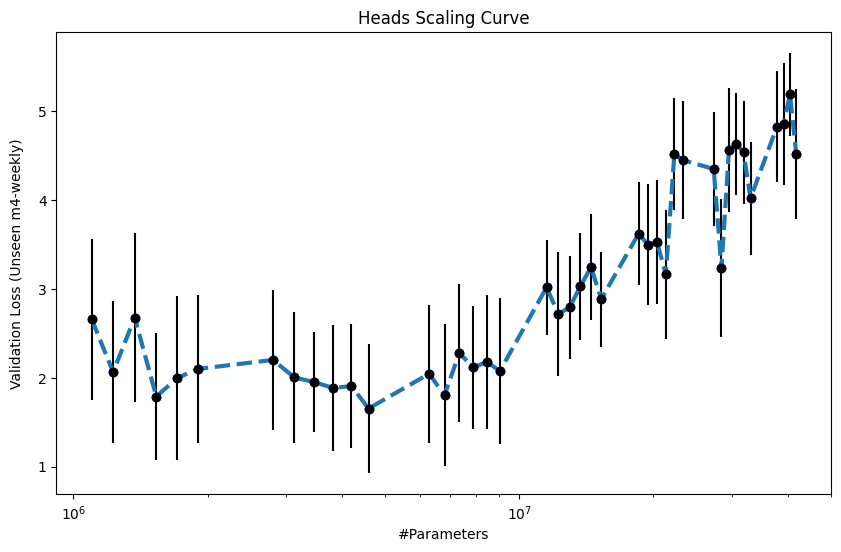

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
heads_halfaug = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 
params_heads_halfaug = [1099392, 1228032, 1373056, 1534464, 1712256, 1906432, 2805120, 3130368, 3472000, 3830016, \
                4204416, 4595200, 6280320, 6802176, 7340416, 7895040, 8466048, 9053440, 11524992, 12243456, \
                12978304, 13729536, 14497152, 15281152, 18539136, 19454208, 20385664, 21333504, 22297728, \
                23278336, 27322752, 28434432, 29562496, 30706944, 31867776, 33044992, 37875840, 39184128, \
                40508800, 41849856]   

groups = []
for head in heads_halfaug:
    groups.append("data-scaling-uniform-0.5_heads_"+str(head))
    
mean_y_heads_halfaug, stderr_y_heads_halfaug = get_mean_std_wandb(groups)

plt.errorbar(params_heads_halfaug, mean_y_heads_halfaug, yerr=stderr_y_heads_halfaug, fmt='o', color="black")
plt.plot(
    params_heads_halfaug, mean_y_heads_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Heads Scaling Curve")
plt.savefig('heads.png')

plt.show()

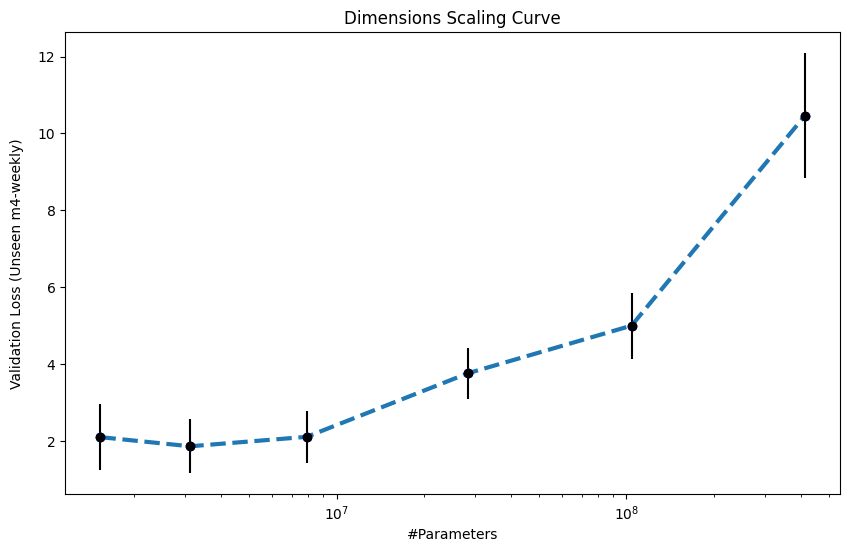

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
dims_per_head_halfaug = [16, 32, 64, 128, 256, 512]
params_dims_per_head_halfaug = [1534464, 3130368, 7895040, 28434432, 104116224, 412766208]

groups = []
for dims in dims_per_head_halfaug:
    groups.append("data-scaling-uniform-0.5_dims_per_head_"+str(dims))
    
mean_y_dims_halfaug, stderr_y_dims_halfaug = get_mean_std_wandb(groups)

plt.errorbar(params_dims_per_head_halfaug, mean_y_dims_halfaug, yerr=stderr_y_dims_halfaug, fmt='o', color="black")
plt.plot(
    params_dims_per_head_halfaug, mean_y_dims_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Dimensions Scaling Curve")
plt.savefig('dims_per_head.png')

plt.show()

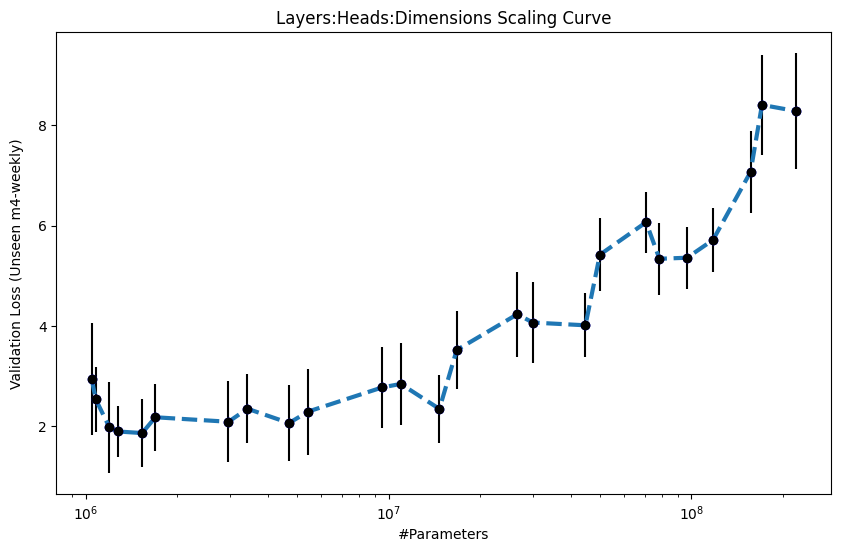

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_three_ratio_halfaug = list(range(4,29))
params_three_ratio_halfaug = [1046016, 1079016, 1196944, 1277356, 1534464, 1697488, 2959536, 3418356, 4689664, 5425336, 9533520, 10969276, 14714880, 16774560, 26584432, 29968900, 44660736, 49835656, 70855440, 78367692, 96764416, 117863536, 156767280, 170942740, 221874432]

groups = []
for layer in layers_three_ratio_halfaug:
    heads = layer // 2
    dims = layer * 2
    groups.append("data-scaling-uniform-0.5_3_ratio_scaling_layers_" + str(layer) + "_heads_" + str(heads) + "_dims_per_head_"+str(dims))
    
mean_y_three_ratio_halfaug, stderr_y_three_ratio_halfaug = get_mean_std_wandb(groups)

plt.errorbar(params_three_ratio_halfaug, mean_y_three_ratio_halfaug, yerr=stderr_y_three_ratio_halfaug, fmt='o', color="black")
plt.plot(
    params_three_ratio_halfaug, mean_y_three_ratio_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Heads:Dimensions Scaling Curve")
plt.savefig('layers:heads:dimensions.png')

plt.show()

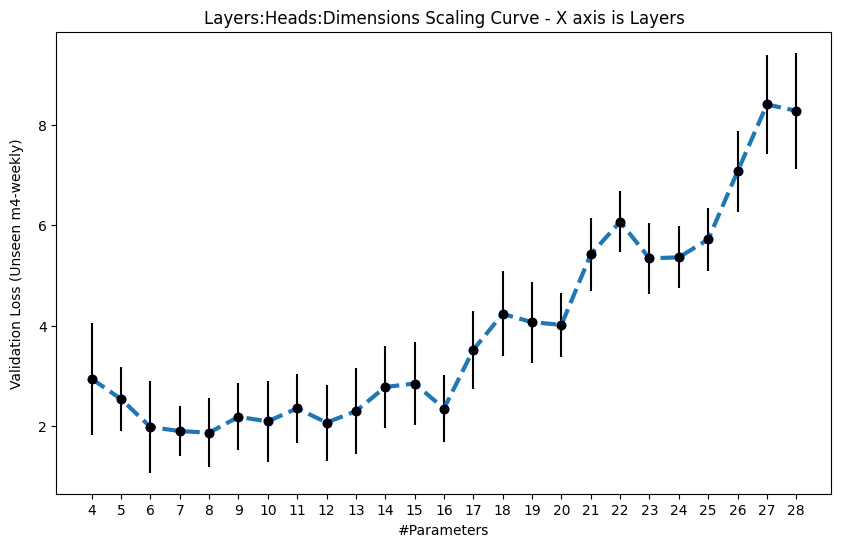

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_three_ratio_halfaug = list(range(4,29))
params_three_ratio_halfaug = [1046016, 1079016, 1196944, 1277356, 1534464, 1697488, 2959536, 3418356, 4689664, 5425336, 9533520, 10969276, 14714880, 16774560, 26584432, 29968900, 44660736, 49835656, 70855440, 78367692, 96764416, 117863536, 156767280, 170942740, 221874432]

groups = []
for layer in layers_three_ratio_halfaug:
    heads = layer // 2
    dims = layer * 2
    groups.append("data-scaling-uniform-0.5_3_ratio_scaling_layers_" + str(layer) + "_heads_" + str(heads) + "_dims_per_head_"+str(dims))
    
mean_y_three_ratio_halfaug, stderr_y_three_ratio_halfaug = get_mean_std_wandb(groups)

plt.errorbar(layers_three_ratio_halfaug, mean_y_three_ratio_halfaug, yerr=stderr_y_three_ratio_halfaug, fmt='o', color="black")
plt.plot(
    layers_three_ratio_halfaug, mean_y_three_ratio_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xticks(layers_three_ratio_halfaug)
plt.title("Layers:Heads:Dimensions Scaling Curve - X axis is Layers")
plt.savefig('layers:heads:dimensions.png')

plt.show()

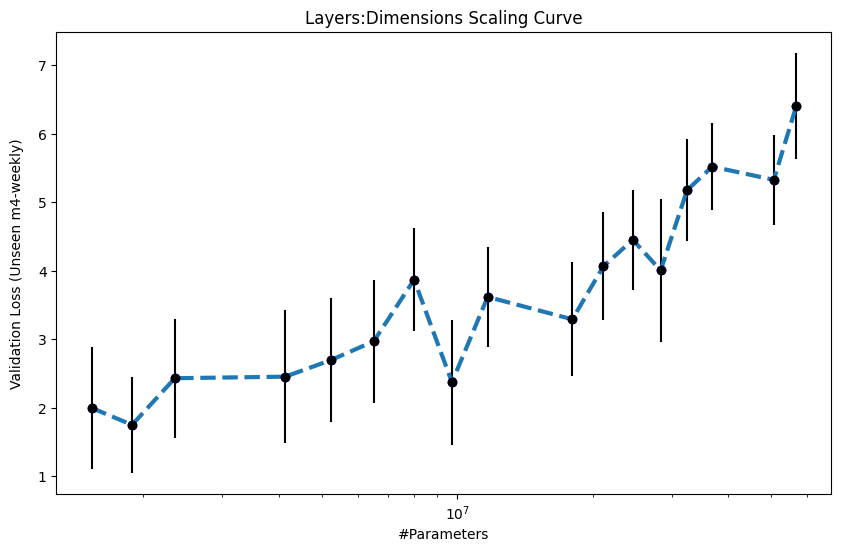

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_halfaug = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_halfaug = [1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, 11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_halfaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-0.5_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_halfaug, stderr_y_layers_dims_ratio_halfaug = get_mean_std_wandb(groups)

plt.errorbar(params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, \
             yerr=stderr_y_layers_dims_ratio_halfaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve")
plt.savefig('layers:dimensions.png')

plt.show()

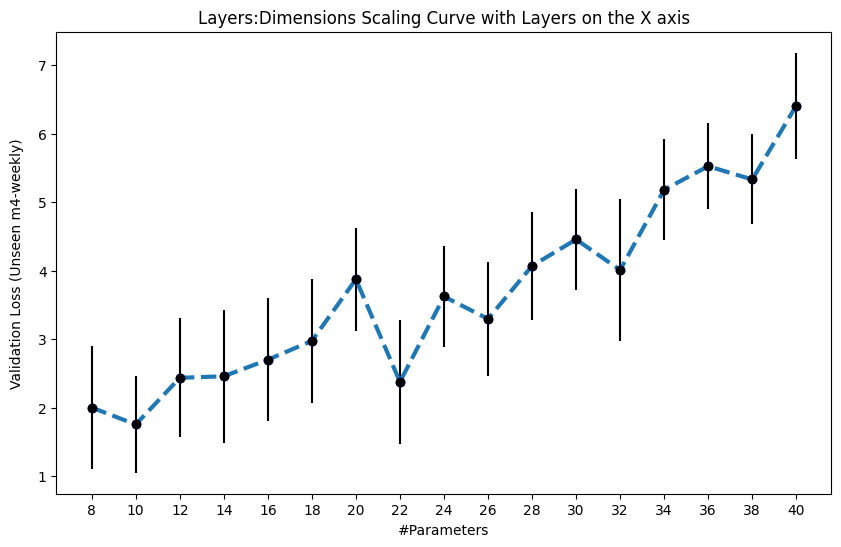

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_halfaug = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_halfaug = [1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, 11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_halfaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-0.5_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_halfaug, stderr_y_layers_dims_ratio_halfaug = get_mean_std_wandb(groups)

plt.errorbar(layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, \
             yerr=stderr_y_layers_dims_ratio_halfaug, fmt='o', color="black")
plt.plot(
    layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xticks(layers_dims_ratio_halfaug)
# plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve with Layers on the X axis")
plt.savefig('layers:dimensions.png')

plt.show()

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


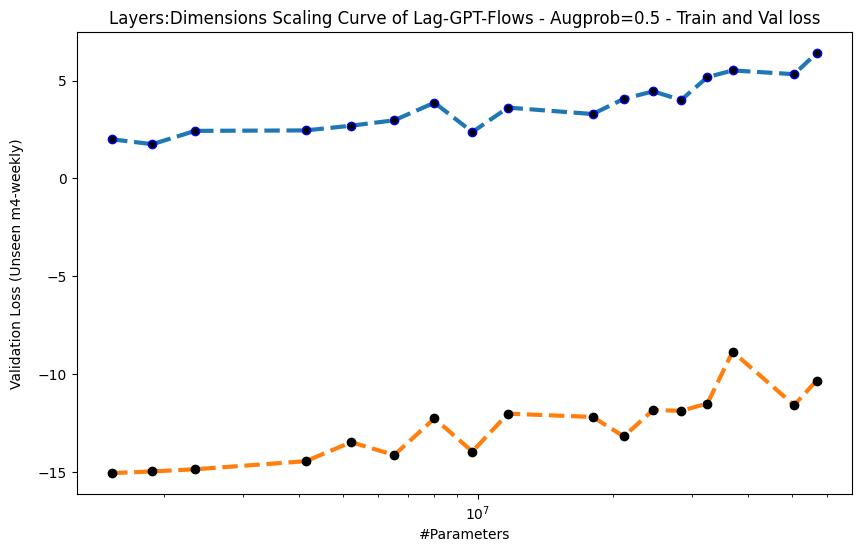

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_halfaug = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_halfaug = [1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, 11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_halfaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-0.5_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_halfaug, stderr_y_layers_dims_ratio_halfaug = get_mean_std_wandb(groups)
mean_y_layers_dims_ratio_halfaug_train, stderr_y_layers_dims_ratio_halfaug_train = get_mean_std_wandb(groups, metric="train_loss")

# plt.errorbar(layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, \
#              yerr=stderr_y_layers_dims_ratio_halfaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue"
)
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug_train, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=0.5 - Train and Val loss")
plt.savefig('layers:dimensions.png')

plt.show()

# Augmentation Probability of 1

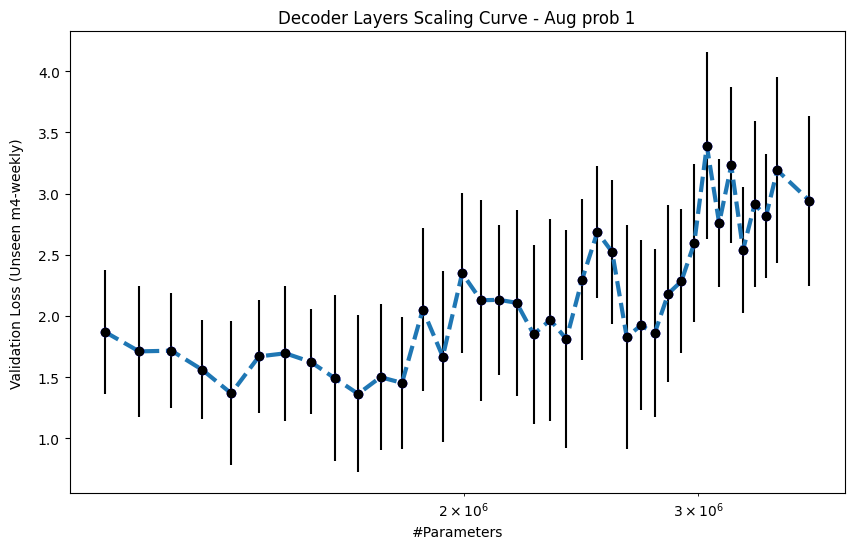

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_fullaug = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, \
          22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40]
params_layers_fullaug = [1074816, 1140480, 1206144, 1271808, 1337472, 1403136, 1468800, 1534464, 1600128, 1665792, 1731456, \
                 1797120, 1862784, 1928448, 1994112, 2059776, 2125440, 2191104, 2256768, 2322432, 2388096, 2453760, \
                 2519424, 2585088, 2650752, 2716416, 2782080, 2847744, 2913408, 2979072, 3044736, 3110400, 3176064, \
                 3241728, 3307392, 3373056, 3438720, 3635712]

groups = []
for layer in layers_fullaug:
    groups.append("data-scaling-uniform-1.0_augprob_1_layers_"+str(layer))
    
mean_y_layers_fullaug, stderr_y_layers_fullaug = get_mean_std_from_csv(groups)

plt.errorbar(params_layers_fullaug, mean_y_layers_fullaug, yerr=stderr_y_layers_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_fullaug, mean_y_layers_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Decoder Layers Scaling Curve - Aug prob 1")
plt.savefig('layers.png')

plt.show()

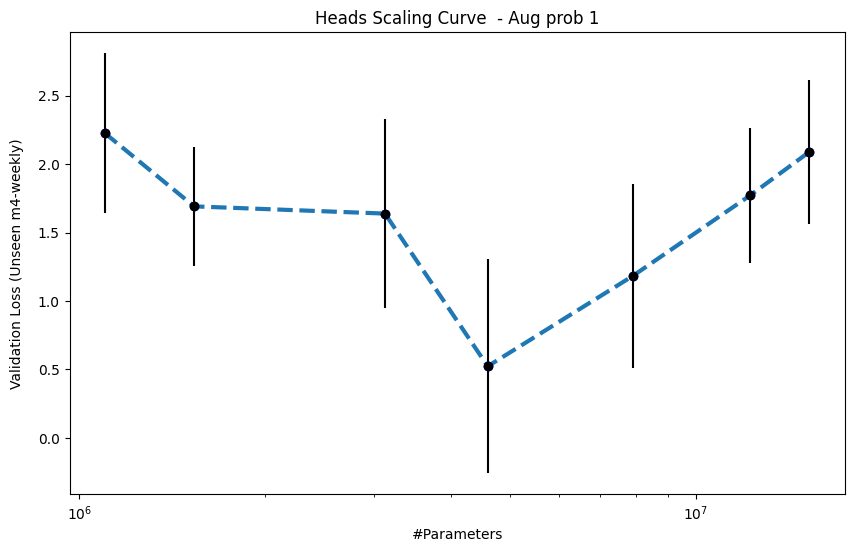

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
heads_fullaug = [1, 4, 8, 12, 16, 20, 24] 
params_heads_fullaug = [1099392, 1534464, 3130368, 4595200, 7895040, 12243456, \
                15281152]   
# heads = [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40] 
# params_heads = [1099392, 1534464, 3130368, 4595200, 7895040, 12243456, \
#                 15281152, 21333504, 28434432, 33044992, 41849856]   


groups = []
for head in heads_fullaug:
    groups.append("data-scaling-uniform-1.0_augprob_1_heads_"+str(head))
    
mean_y_heads_fullaug, stderr_y_heads_fullaug = get_mean_std_from_csv(groups)

plt.errorbar(params_heads_fullaug, mean_y_heads_fullaug, yerr=stderr_y_heads_fullaug, fmt='o', color="black")
plt.plot(
    params_heads_fullaug, mean_y_heads_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Heads Scaling Curve  - Aug prob 1")
plt.savefig('heads.png')

plt.show()

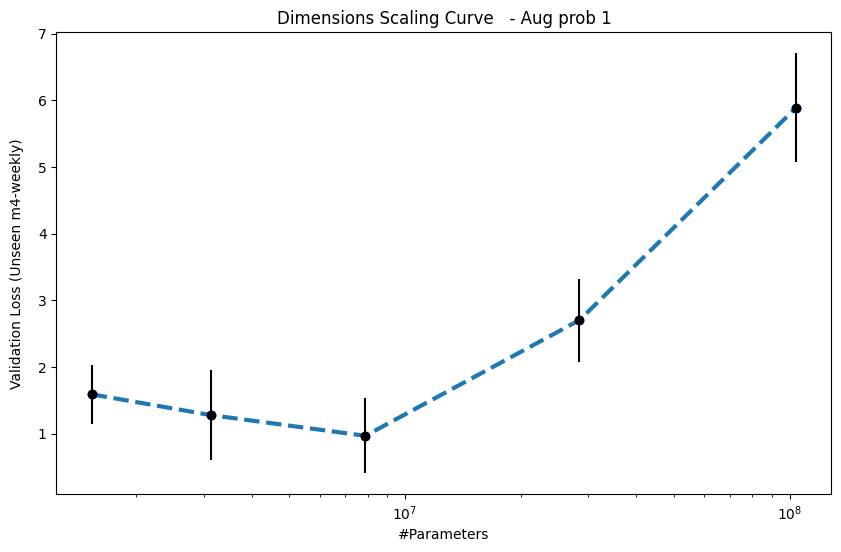

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
dims_per_head_fullaug = [16, 32, 64, 128, 256]
params_dims_per_head_fullaug = [1534464, 3130368, 7895040, 28434432, 104116224]

groups = []
for dims in dims_per_head_fullaug:
    groups.append("data-scaling-uniform-1.0_augprob_1_dims_per_head_"+str(dims))
    
mean_y_dims_fullaug, stderr_y_dims_fullaug = get_mean_std_from_csv(groups)

plt.errorbar(params_dims_per_head_fullaug, mean_y_dims_fullaug, yerr=stderr_y_dims_fullaug, fmt='o', color="black")
plt.plot(
    params_dims_per_head_fullaug, mean_y_dims_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Dimensions Scaling Curve   - Aug prob 1")
plt.savefig('dims_per_head.png')

plt.show()

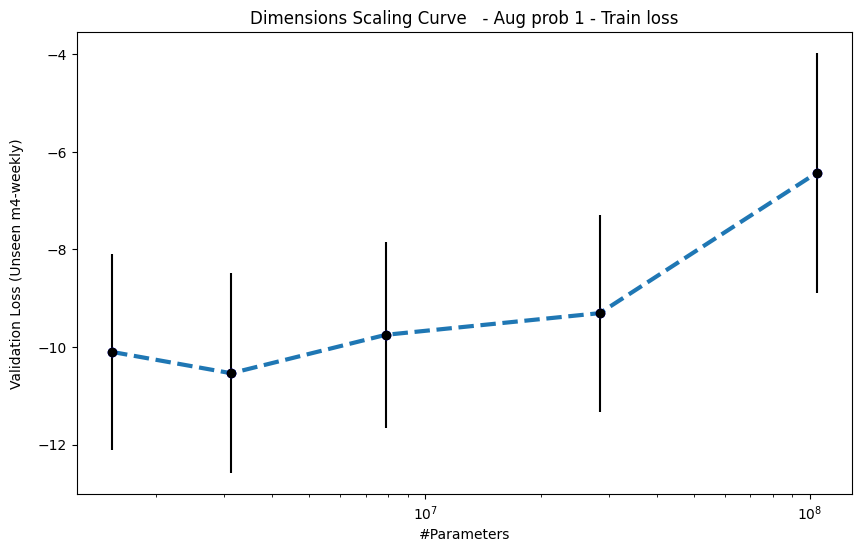

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
dims_per_head_fullaug = [16, 32, 64, 128, 256]
params_dims_per_head_fullaug = [1534464, 3130368, 7895040, 28434432, 104116224]

groups = []
for dims in dims_per_head_fullaug:
    groups.append("data-scaling-uniform-1.0_augprob_1_dims_per_head_"+str(dims))
    
mean_y_dims_fullaug, stderr_y_dims_fullaug = get_mean_std_from_csv(groups, metric="train_loss")

plt.errorbar(params_dims_per_head_fullaug, mean_y_dims_fullaug, yerr=stderr_y_dims_fullaug, fmt='o', color="black")
plt.plot(
    params_dims_per_head_fullaug, mean_y_dims_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Dimensions Scaling Curve   - Aug prob 1 - Train loss")
plt.savefig('dims_per_head.png')

plt.show()

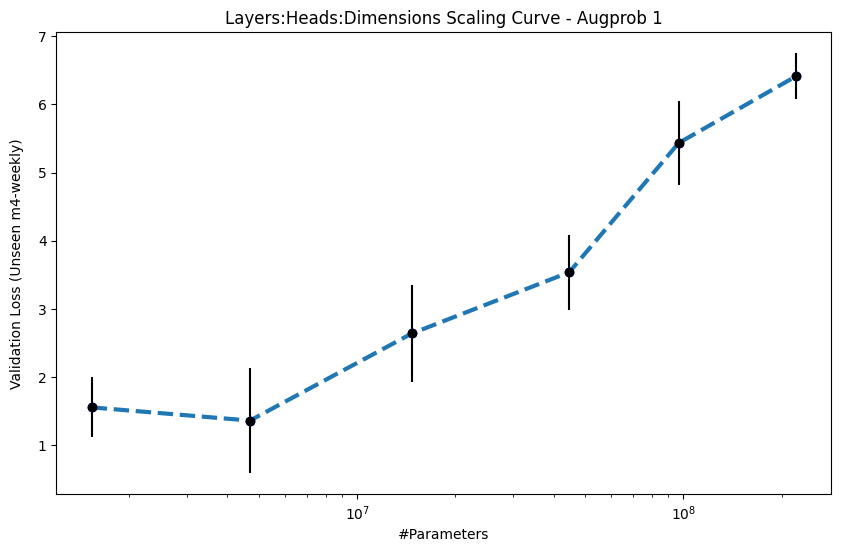

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_three_ratio_fullaug = [8,12,16,20,24,28]
params_three_ratio_fullaug = [1534464, 4689664, 14714880, 44660736, 96764416, 221874432] 

groups = []
for layer in layers_three_ratio_fullaug:
    heads = layer // 2
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_3_ratio_scaling_augprob_1_layers_" + str(layer) + "_heads_" + str(heads) + "_dims_per_head_"+str(dims))
    
mean_y_three_ratio_fullaug, stderr_y_three_ratio_fullaug = get_mean_std_from_csv(groups)

plt.errorbar(params_three_ratio_fullaug, mean_y_three_ratio_fullaug, yerr=stderr_y_three_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_three_ratio_fullaug, mean_y_three_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Heads:Dimensions Scaling Curve - Augprob 1")
plt.savefig('layers:heads:dimensions.png')

plt.show()

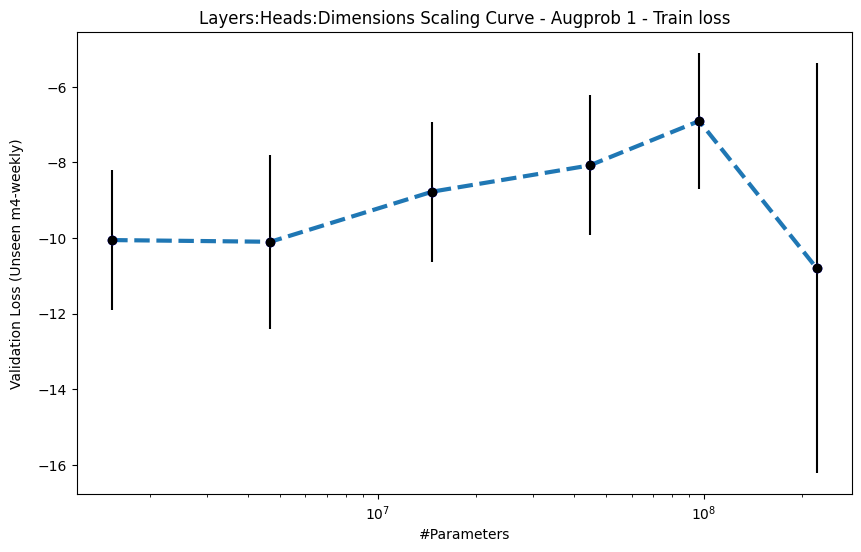

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_three_ratio_fullaug = [8,12,16,20,24,28]
params_three_ratio_fullaug = [1534464, 4689664, 14714880, 44660736, 96764416, 221874432] 

groups = []
for layer in layers_three_ratio_fullaug:
    heads = layer // 2
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_3_ratio_scaling_augprob_1_layers_" + str(layer) + "_heads_" + str(heads) + "_dims_per_head_"+str(dims))
    
mean_y_three_ratio_fullaug, stderr_y_three_ratio_fullaug = get_mean_std_from_csv(groups, metric="train_loss")

plt.errorbar(params_three_ratio_fullaug, mean_y_three_ratio_fullaug, yerr=stderr_y_three_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_three_ratio_fullaug, mean_y_three_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Heads:Dimensions Scaling Curve - Augprob 1 - Train loss")
plt.savefig('layers:heads:dimensions.png')

plt.show()

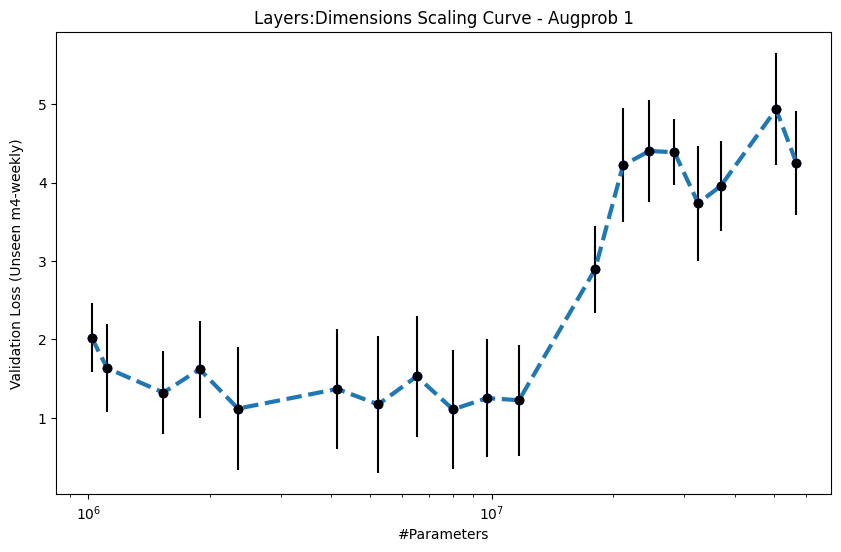

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, \
                            11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_from_csv(groups)

plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
             yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve - Augprob 1")
plt.savefig('layers:dimensions.png')

plt.show()

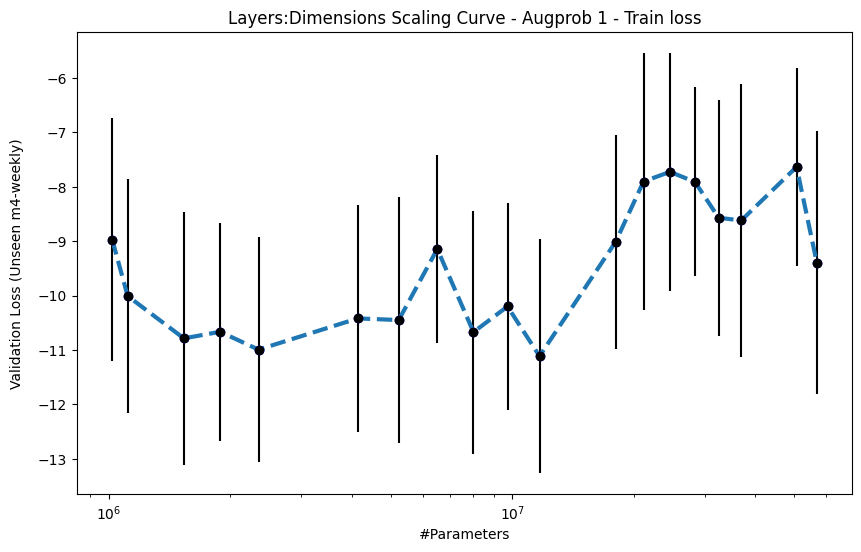

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, \
                            11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_from_csv(groups, metric="train_loss")

plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
             yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve - Augprob 1 - Train loss")
plt.savefig('layers:dimensions.png')

plt.show()

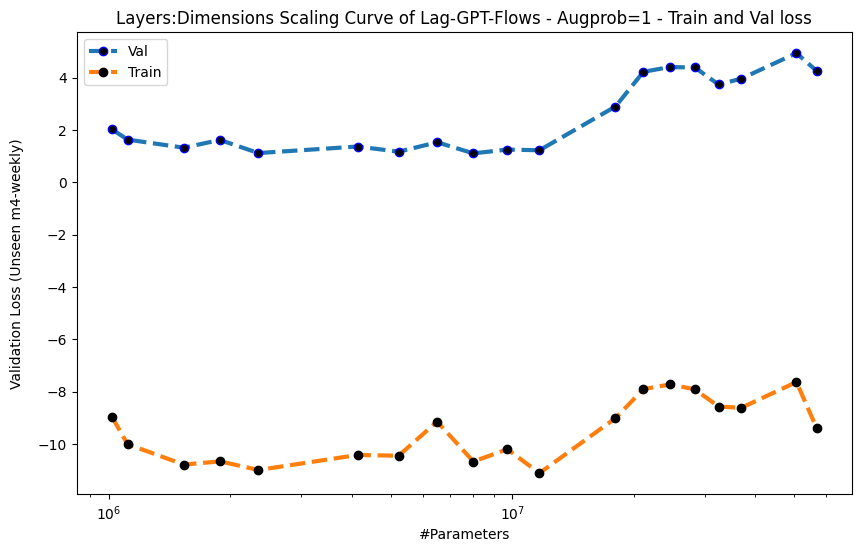

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
params_layers_dims_ratio_fullaug_nolrs = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, 9728704, \
                            11679232, 18028992, 21147136, 24584896, 28354560, 32468416, 36938752, 50649792, 56828416]

groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug_nolrs, stderr_y_layers_dims_ratio_fullaug_nolrs = get_mean_std_from_csv(groups)
mean_y_layers_dims_ratio_fullaug_train_nolrs, stderr_y_layers_dims_ratio_fullaug_train_nolrs \
= get_mean_std_from_csv(groups, metric="train_loss")

# plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
#              yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug_nolrs, mean_y_layers_dims_ratio_fullaug_nolrs, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug_nolrs, mean_y_layers_dims_ratio_fullaug_train_nolrs, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

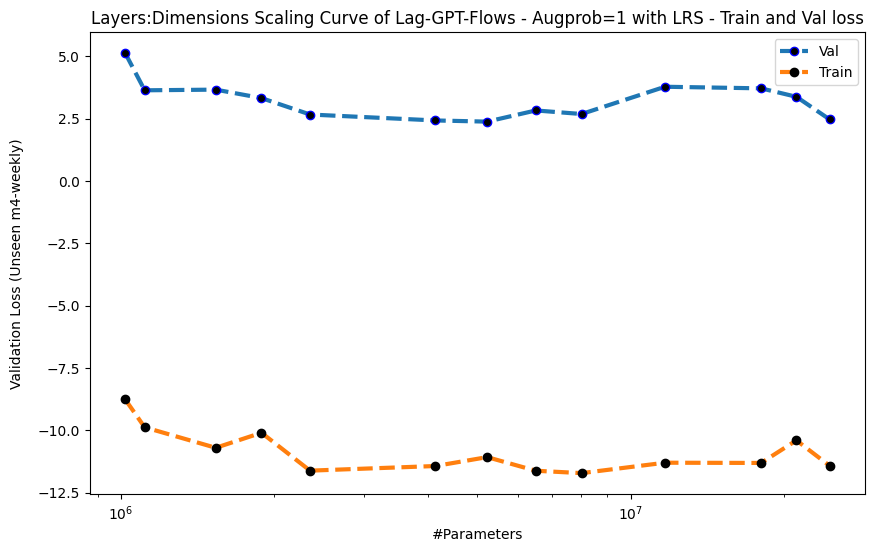

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_"
                  + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_wandb(groups)
mean_y_layers_dims_ratio_fullaug_train, stderr_y_layers_dims_ratio_fullaug_train \
= get_mean_std_wandb(groups, metric="train_loss")

# plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
#              yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 with LRS - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

/home/toolkit/.conda/envs/scaling/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/toolkit/.conda/envs/scaling/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/toolkit/.conda/envs/scaling/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/toolkit/.conda/envs/scaling/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/toolkit/.conda/envs/scaling/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',


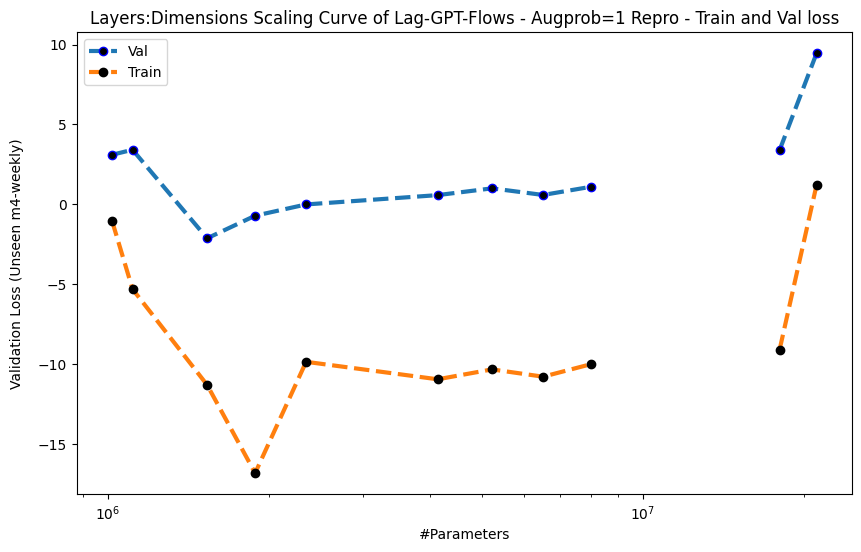

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_repro_layers_dims_per_head_ratio_scaling_layers_"
                  + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_wandb(groups)
mean_y_layers_dims_ratio_fullaug_train, stderr_y_layers_dims_ratio_fullaug_train \
= get_mean_std_wandb(groups, metric="train_loss")

# plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
#              yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 Repro - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

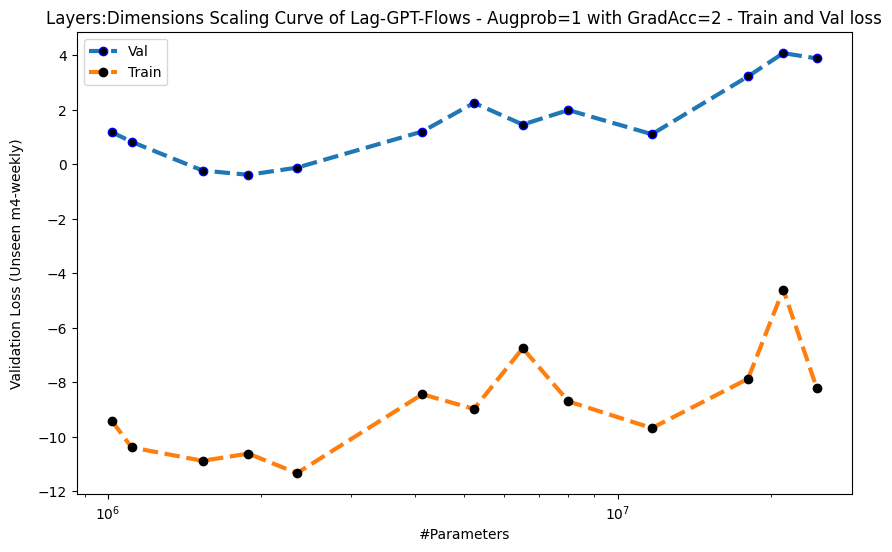

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_gradacc_2_repro_layers_dims_per_head_ratio_scaling_layers_"
                  + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_wandb(groups)
mean_y_layers_dims_ratio_fullaug_train, stderr_y_layers_dims_ratio_fullaug_train \
= get_mean_std_wandb(groups, metric="train_loss")

# plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
#              yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 with GradAcc=2 - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

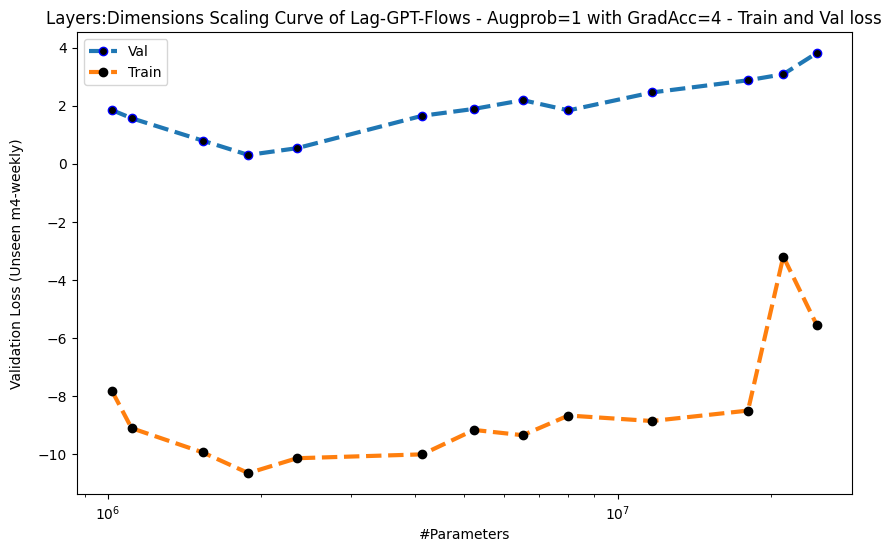

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_gradacc_4_repro_layers_dims_per_head_ratio_scaling_layers_"
                  + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug, stderr_y_layers_dims_ratio_fullaug = get_mean_std_wandb(groups)
mean_y_layers_dims_ratio_fullaug_train, stderr_y_layers_dims_ratio_fullaug_train \
= get_mean_std_wandb(groups, metric="train_loss")

# plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, \
#              yerr=stderr_y_layers_dims_ratio_fullaug, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="blue", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 with GradAcc=4 - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

Group: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/3 - metric available
Run: data-

Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_32/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_16_dims_per_head_3

Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/6 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/4 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/9 - metric available
Run: data-scali

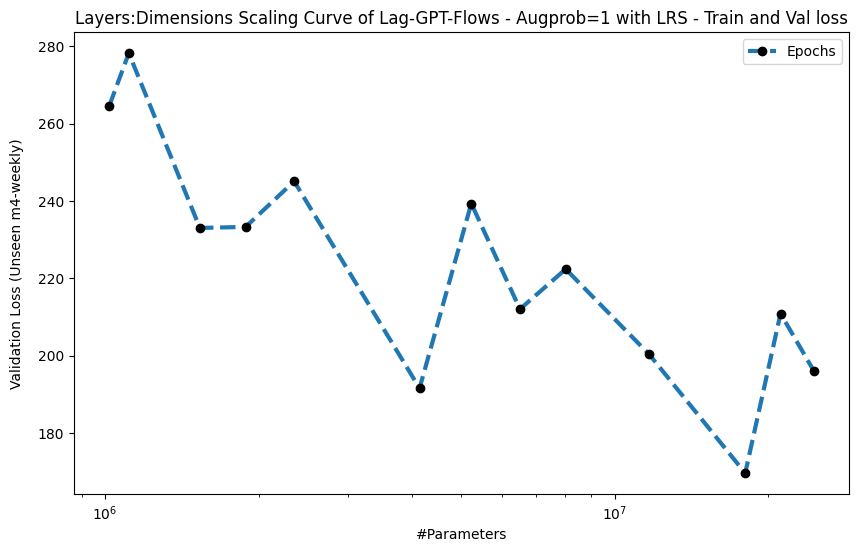

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
groups_no_lrs = []
groups_gradacc_2 = []
groups_gradacc_4 = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups.append("data-scaling-uniform-1.0_augprob_1_correct_with_lrs_again_layers_dims_per_head_ratio_scaling_layers_"
                  + str(layer) + "_dims_per_head_"+str(dims))
    groups_no_lrs.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))

mean_y_layers_dims_ratio_fullaug_epoch, stderr_y_layers_dims_ratio_fullaug_epoch = get_mean_std_wandb(groups, "epoch")
mean_y_layers_dims_ratio_fullaug_nolrs_epoch, stderr_y_layers_dims_ratio_fullaug_nolrs_epoch = get_mean_std_wandb(groups_no_lrs, "epoch")

plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_nolrs_epoch, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Epochs"
)

plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 with LRS - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

Group: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dim

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/9 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/1 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/6 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_10_dims_per_head_20/6 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_18_dims_per_head_36/4 - metric available
Run: data-scali

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/5 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_28_dims_per_head_56/9 - metric available
Run: data-scali

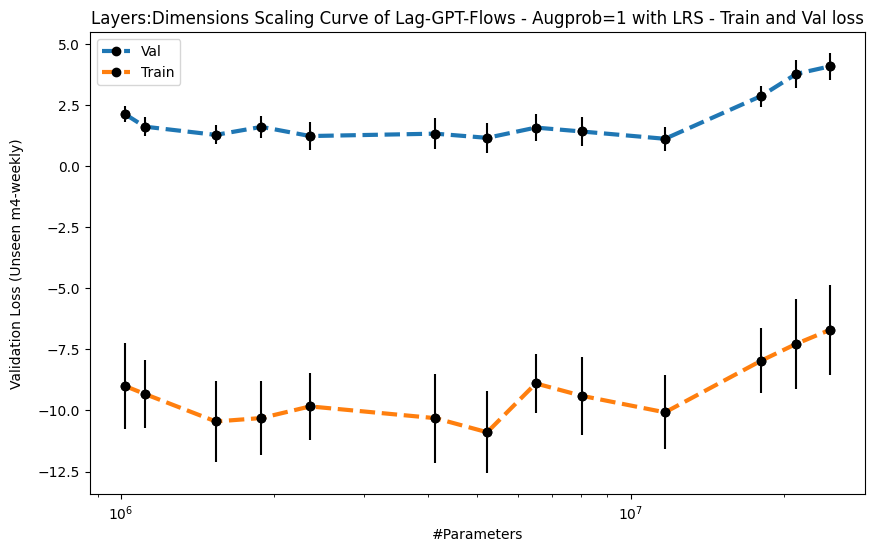

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
groups_no_lrs = []
groups_gradacc_2 = []
groups_gradacc_4 = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups_no_lrs.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug_nolrs, stderr_y_layers_dims_ratio_fullaug_nolrs = get_mean_std_wandb(groups_no_lrs)
mean_y_layers_dims_ratio_fullaug_train_nolrs, stderr_y_layers_dims_ratio_fullaug_train_nolrs \
= get_mean_std_wandb(groups_no_lrs, metric="train_loss")


# mean_y_layers_dims_ratio_fullaug_nolrs, stderr_y_layers_dims_ratio_fullaug_nolrs = get_mean_std_wandb(groups_no_lrs)
# mean_y_layers_dims_ratio_fullaug_train_nolrs, stderr_y_layers_dims_ratio_fullaug_train_nolrs \
# = get_mean_std_wandb(groups_no_lrs, metric="train_loss")

plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_nolrs, \
             yerr=stderr_y_layers_dims_ratio_fullaug_nolrs, fmt='o', color="black")
plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train_nolrs, \
             yerr=stderr_y_layers_dims_ratio_fullaug_train_nolrs, fmt='o', color="black")
# plt.plot(
#     params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, 
#     marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Val - LRS"
# )
# plt.plot(
#     params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train, ls="--", lw=3, 
#     marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train - LRS"
# )

plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_nolrs, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Val"
)
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_train_nolrs, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Train"
)


plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1 with LRS - Train and Val loss")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

Group: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/7 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/8 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_2_dims_per_head_4/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dim

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/3 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/10 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/2 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/10 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_12_dims_per_head_24/9 - metric not available
Run: d

Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/9 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/1 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/4 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/3 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/1 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/4 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_20_dims_per_head_40/2 - metric not available


Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/6 - metric available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/10 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/9 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/8 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/7 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/6 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/4 - metric not available
Run: data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_30_dims_per_head_60/5 - metric n

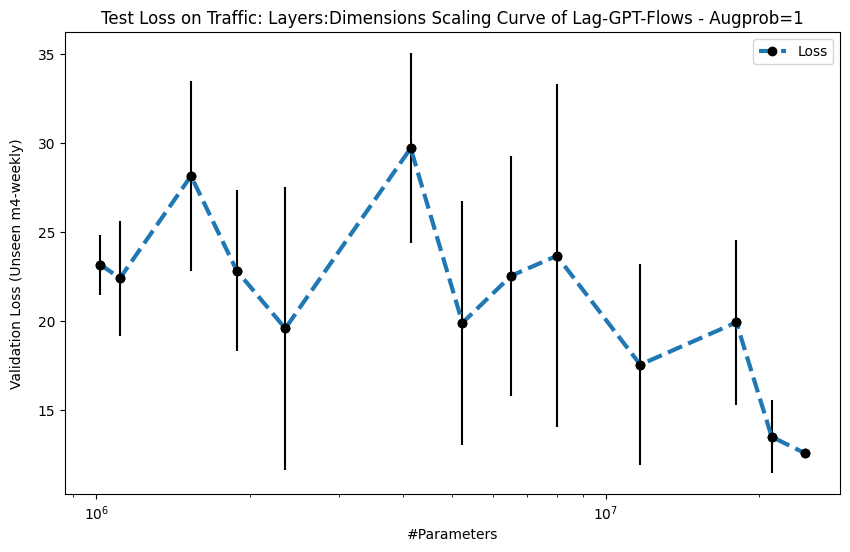

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Values
layers_dims_ratio_fullaug = [2,4,8,10,12,14,16,18,20,24,26,28,30]#32,34,36,38,40]
params_layers_dims_ratio_fullaug = [1019328, 1113088, 1534464, 1886656, 2349568, 4139712, 5229568, 6516160, 8011776, \
                            11679232, 18028992, 21147136, 24584896]#, 28354560, 32468416, 36938752, 50649792, 56828416]
groups = []
groups_no_lrs = []
groups_gradacc_2 = []
groups_gradacc_4 = []
for layer in layers_dims_ratio_fullaug:
    dims = layer * 2
    groups_no_lrs.append("data-scaling-uniform-1.0_augprob_1_layers_dims_per_head_ratio_scaling_layers_" + \
                         str(layer) + "_dims_per_head_"+str(dims))
    
mean_y_layers_dims_ratio_fullaug_traffic, stderr_y_layers_dims_ratio_fullaug_traffic \
= get_mean_std_wandb(groups_no_lrs, "traffic/val_loss")

plt.errorbar(params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_traffic, \
             yerr=stderr_y_layers_dims_ratio_fullaug_traffic, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug_traffic, ls="--", lw=3, 
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Loss"
)

plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("Test Loss on Traffic: Layers:Dimensions Scaling Curve of Lag-GPT-Flows - Augprob=1")
plt.savefig('layers:dimensions.png')
plt.legend()
plt.show()

In [77]:
mean_y_layers_dims_ratio_fullaug_traffic

[23.1617,
 22.3984,
 28.1444,
 22.8229,
 19.5784,
 29.7001,
 19.8931,
 22.5365,
 29.9421,
 17.5472,
 19.9209,
 13.4975,
 12.5725]

# All Curves in One Plot

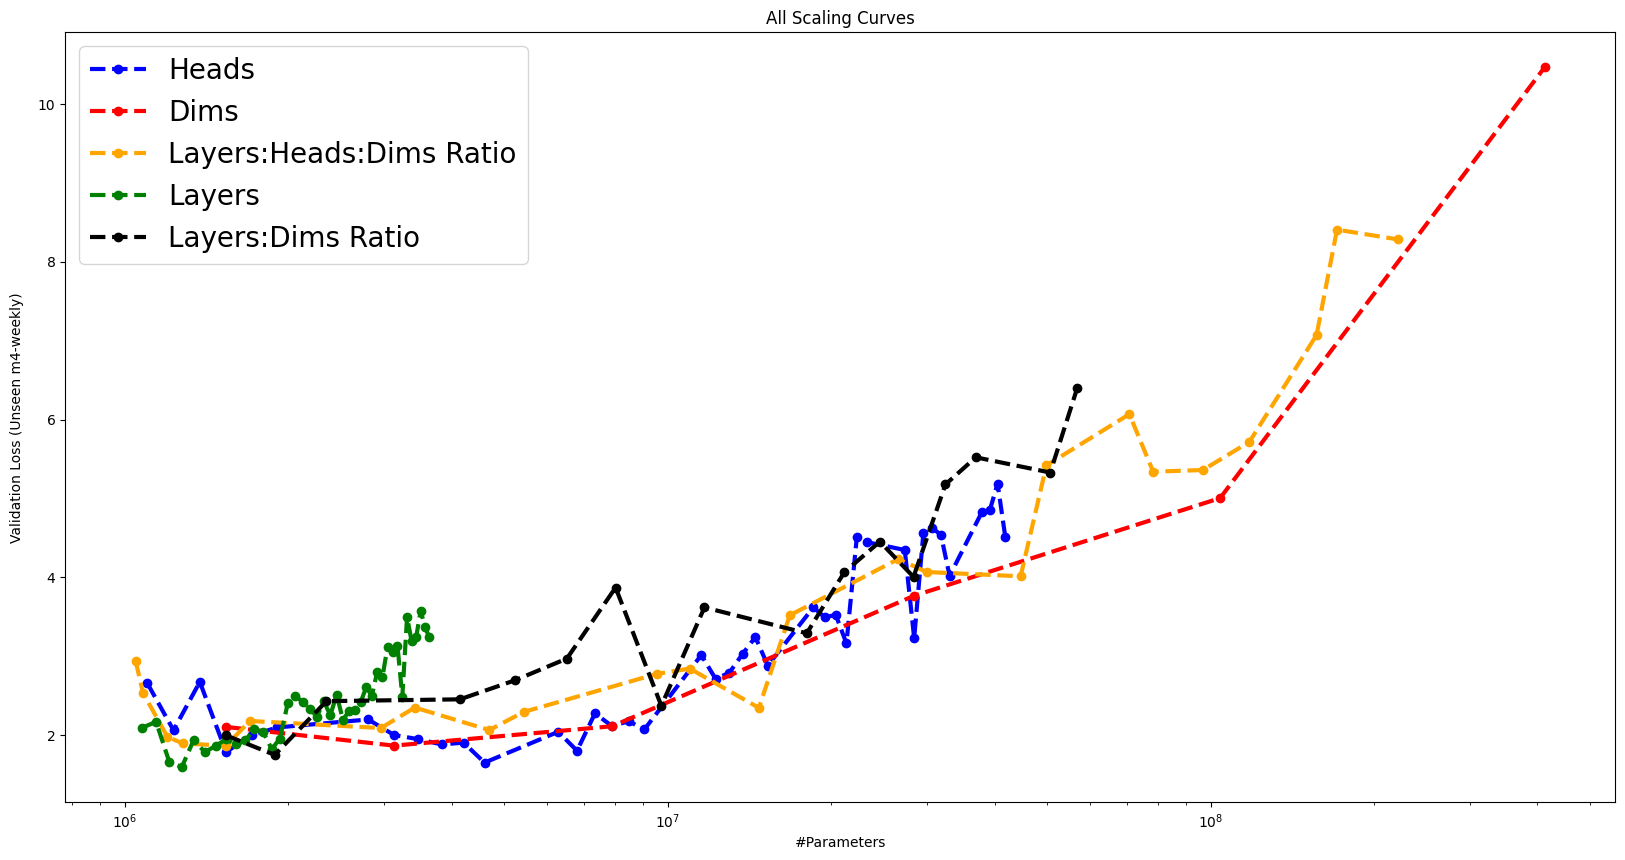

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (20, 10)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_halfaug, mean_y_heads_halfaug, ls="--", lw=3, color="blue", 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue", label="Heads"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_halfaug, mean_y_dims_halfaug, ls="--", lw=3, color="red", 
    marker="o", markersize=6, markerfacecolor="red", markeredgecolor="red", label="Dims"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_halfaug, mean_y_three_ratio_halfaug, ls="--", lw=3, color="orange",
    marker="o", markersize=6, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_halfaug, mean_y_layers_halfaug, ls="--", lw=3, color="green",
    marker="o", markersize=6, markerfacecolor="green", markeredgecolor="green", label="Layers"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, color="black",
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio"
)
plt.legend(prop = { "size": 20 })
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("All Scaling Curves")
plt.savefig('all-curves-scaling.png')

plt.show()

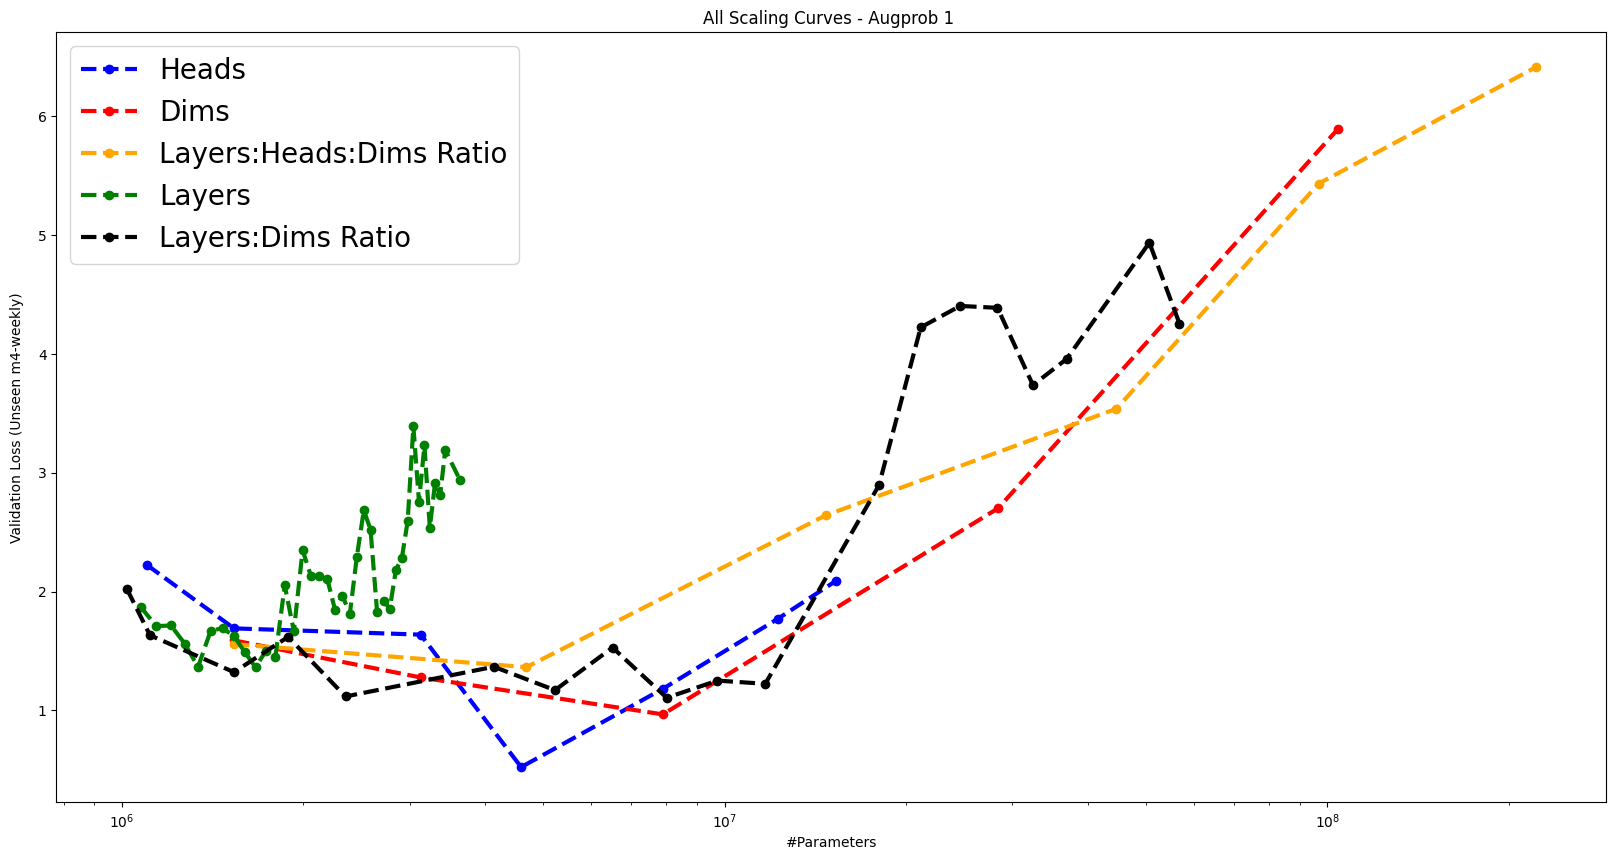

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (20, 10)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_fullaug, mean_y_heads_fullaug, ls="--", lw=3, color="blue", 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue", label="Heads"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_fullaug, mean_y_dims_fullaug, ls="--", lw=3, color="red", 
    marker="o", markersize=6, markerfacecolor="red", markeredgecolor="red", label="Dims"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_fullaug, mean_y_three_ratio_fullaug, ls="--", lw=3, color="orange",
    marker="o", markersize=6, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_fullaug, mean_y_layers_fullaug, ls="--", lw=3, color="green",
    marker="o", markersize=6, markerfacecolor="green", markeredgecolor="green", label="Layers"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, color="black",
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio"
)
plt.legend(prop = { "size": 20 })
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("All Scaling Curves - Augprob 1 ")
plt.savefig('all-curves-scaling.png')

plt.show()

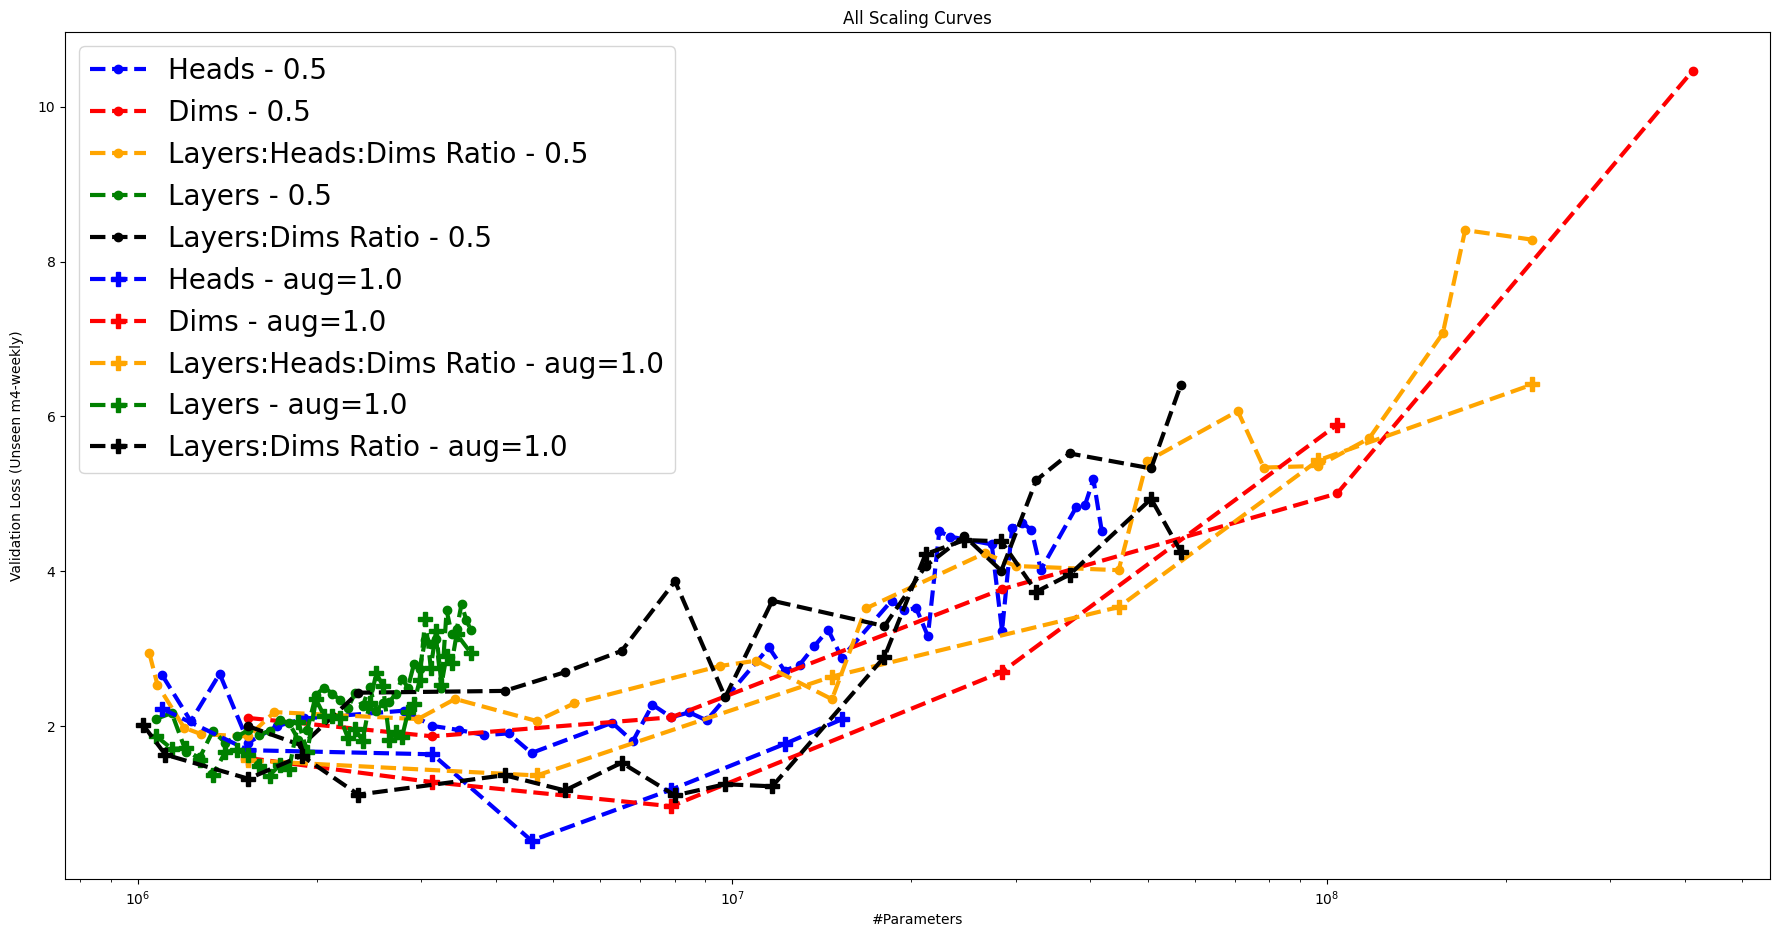

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (22, 11)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_halfaug, mean_y_heads_halfaug, ls="--", lw=3, color="blue", 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue", label="Heads - 0.5"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_halfaug, mean_y_dims_halfaug, ls="--", lw=3, color="red", 
    marker="o", markersize=6, markerfacecolor="red", markeredgecolor="red", label="Dims - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_halfaug, mean_y_three_ratio_halfaug, ls="--", lw=3, color="orange",
    marker="o", markersize=6, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_halfaug, mean_y_layers_halfaug, ls="--", lw=3, color="green",
    marker="o", markersize=6, markerfacecolor="green", markeredgecolor="green", label="Layers - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, color="black",
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio - 0.5"
)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_fullaug, mean_y_heads_fullaug, ls="--", lw=3, color="blue", 
    marker="P", markersize=10, markerfacecolor="blue", markeredgecolor="blue", label="Heads - aug=1.0"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_fullaug, mean_y_dims_fullaug, ls="--", lw=3, color="red", 
    marker="P", markersize=10, markerfacecolor="red", markeredgecolor="red", label="Dims - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_fullaug, mean_y_three_ratio_fullaug, ls="--", lw=3, color="orange",
    marker="P", markersize=10, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_fullaug, mean_y_layers_fullaug, ls="--", lw=3, color="green",
    marker="P", markersize=10, markerfacecolor="green", markeredgecolor="green", label="Layers - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, color="black",
    marker="P", markersize=10, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio - aug=1.0"
)


plt.legend(prop = { "size": 20 })
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("All Scaling Curves")
plt.savefig('all-curves-scaling.png')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

# Set figure default figure size
plt.rcParams["figure.figsize"] = (22, 11)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_halfaug, mean_y_heads_halfaug, ls="--", lw=3, color="blue", 
    marker="o", markersize=6, markerfacecolor="blue", markeredgecolor="blue", label="Heads - 0.5"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_halfaug, mean_y_dims_halfaug, ls="--", lw=3, color="red", 
    marker="o", markersize=6, markerfacecolor="red", markeredgecolor="red", label="Dims - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_halfaug, mean_y_three_ratio_halfaug, ls="--", lw=3, color="orange",
    marker="o", markersize=6, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_halfaug, mean_y_layers_halfaug, ls="--", lw=3, color="green",
    marker="o", markersize=6, markerfacecolor="green", markeredgecolor="green", label="Layers - 0.5"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_halfaug, mean_y_layers_dims_ratio_halfaug, ls="--", lw=3, color="black",
    marker="o", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio - 0.5"
)

# plt.errorbar(params_heads, mean_y_heads, yerr=stderr_y_heads, fmt='o', color="black")
plt.plot(
    params_heads_fullaug, mean_y_heads_fullaug, ls="--", lw=3, color="blue", 
    marker="P", markersize=6, markerfacecolor="blue", markeredgecolor="blue", label="Heads - aug=1.0"
)
# plt.errorbar(params_dims, mean_y_dims, yerr=stderr_y_dims, fmt='o', color="black")
plt.plot(
    params_dims_per_head_fullaug, mean_y_dims_fullaug, ls="--", lw=3, color="red", 
    marker="P", markersize=6, markerfacecolor="red", markeredgecolor="red", label="Dims - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_three_ratio_fullaug, mean_y_three_ratio_fullaug, ls="--", lw=3, color="orange",
    marker="P", markersize=6, markerfacecolor="orange", markeredgecolor="orange", label="Layers:Heads:Dims Ratio - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_fullaug, mean_y_layers_fullaug, ls="--", lw=3, color="green",
    marker="P", markersize=6, markerfacecolor="green", markeredgecolor="green", label="Layers - aug=1.0"
)
# plt.errorbar(params_ratio, mean_y_ratio, yerr=stderr_y_ratio, fmt='o', color="black")
plt.plot(
    params_layers_dims_ratio_fullaug, mean_y_layers_dims_ratio_fullaug, ls="--", lw=3, color="black",
    marker="P", markersize=6, markerfacecolor="black", markeredgecolor="black", label="Layers:Dims Ratio - aug=1.0"
)


plt.legend(prop = { "size": 20 })
plt.xlabel("#Parameters")
plt.ylabel("Validation Loss (Unseen m4-weekly)", labelpad=10)
plt.xscale("log")
plt.title("All Scaling Curves")
plt.savefig('all-curves-scaling.png')

plt.show()

# All Models

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Replace these filenames with the actual paths and filenames of your PNG images
# image1 = Image.open("/home/toolkit/pytorch-transformer-ts/lag-transformer/all-curves-scaling.png")
# image2 = Image.open("/home/toolkit/pytorch-transformer-ts/lag-gpt/all-curves-scaling.png")
# image3 = Image.open("/home/toolkit/pytorch-transformer-ts/lag-gpt-flows/all-curves-scaling.png")

# # Create a figure and three subplots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 40), sharex=True, sharey=True)
# plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0)

# # Turn off axis ticks and labels for all subplots
# ax1.axis('off')
# ax2.axis('off')
# ax3.axis('off')

# # Display the images on each subplot
# ax1.imshow(image1)
# ax2.imshow(image2)
# ax3.imshow(image3)

# # Add titles to the subplots
# title_fontsize = 20
# ax1.set_title("Lag-Transformer")
# ax2.set_title("Lag-GPT")
# ax3.set_title("Lag-GPT-Flows")

# # Show the plot
# plt.show()